# Data Mining - Insurance Project
**Group Members**:
- Canhoto, Vera (m20210659@novaims.unl.pt)
- Correa, Lucas (m20211006@novaims.unl.pt)
- Shin, Doyun (m20200565@novaims.unl.pt)

In [16]:
# Jupyter notebook display size adjustment
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<a class="anchor" id="0.1"></a>

# **Table of Contents**

Structured as per CRISP-DM method, but it was used flexibly to better reflect the focus of the project. Further qualitative elements are addressed in the report attached where applicable.

1. [Business Understanding](#1)
   - 1.1 [Business Objectives](#1.1)
   - 1.2 [Situation Assessment](#1.2)
   - 1.3 [Data Mining Goals](#1.3)
   - 1.4 [Project Plan](#1.4)


2. [Data Understanding](#2)
   - 2.1 [Initial Data Collection](#2.1)
   - 2.2 [Data Description](#2.2)
   - 2.3 [Data Exploration](#2.3)
   - 2.4 [Data Quality Verification](#2.4)
  
  
3. [Data Preparation](#3)
   - 3.1 [Data Selection](#3.1)
   - 3.2 [Data Cleaning](#3.2) 
   - 3.3 [Data Construction](#3.3) 
   - 3.4 [Data Integration](#3.4) 
   - 3.5 [Data Formatting](#3.5)
   - 3.6 [Dataset Description](#3.6)
   
   
4. [Modeling](#4)
   - 4.1 [Modeling Technique Selection](#4.1) 
   - 4.2 [Test Design](#4.2)
   - 4.3 [Model Building](#4.3)
   - 4.4 [Model Assessment](#4.4)
   
   
5. [Evaluation](#5)
   - 5.1 [Evaluate Results](#5.1)
   - 5.2 [Review Process](#5.2)
   - 5.3 [Next Steps](#5.3)
 
 
6. [Deployment Suggestion](#6)
   - 6.1 [Deployment Plan](#6.1)
   - 6.2 [Plan Monitoring and Maintenance](#6.2)
   - 6.3 [Final Report](#6.3)
   - 6.4 [Project Review](#6.4)

# 1. Business Understanding <a class="anchor" id="1"></a>

## 1.1 Business Objective <a class="anchor" id="1.1"></a>

To better understand customer profiles, especially from the marketing department's perspectives.

## 1.2 Situation Assessment <a class="anchor" id="1.2"></a>

**Computational power**

Computer1: 

Computer2: 

Computer3: 
- CPU: Intel(R) Core i5-8250U CPU
- Memory: 8GB
- GPU: Intel UHD Graphics 620
    
No significant hindrance identified in the initial stage, considering the size of the data and the required task.

**Programming Language:** Python

**Available / utilized libraries**

In [86]:
import pandas as pd
import numpy as np
from math import ceil


# Data Exploration
from pandas_profiling import ProfileReport



#Clustering
#from kmodes.kprototypes import KPrototypes
#hierarchical clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
#from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

# Missing Values imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Preprocessing
from sklearn.preprocessing import (Normalizer,MinMaxScaler,RobustScaler,StandardScaler,PowerTransformer)

#outliers
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# Visualization
import matplotlib
#matplotlib.use('TkAgg', force=True)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Import TSNE
#from sklearn.manifold import TSNE



# Data Preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1.3 Data Mining Goals  <a class="anchor" id="1.3"></a>

In [18]:
# Conduct customer segmentation on the customer data => data mining problem type is segmentation


## 1.4 Project Plan  <a class="anchor" id="1.4"></a>

In [19]:
# possible clustering techniques: KNN or K-prototype, dependig on the data.

# 2. Data Understanding <a class="anchor" id="2"></a>

## 2.1 Initial Data Collection <a class="anchor" id="2.1"></a>

We have only one source of data hence assessment of potential quality problem from data merge is not applicable

In [20]:
df = pd.read_sas('a2z_insurance.sas7bdat')
df.tail()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91
10295,10296.0,1990.0,1981.0,b'4 - PhD',2815.0,1.0,1.0,463.75,0.27,414.08,94.45,141.25,6.89,12.89


## 2.2 Data Description  <a class="anchor" id="2.2"></a>
Based on the metadata provided with some errors in the project description was corrected (eg., all the variable names, description of Birthday was "Customer’s first policy", etc)

Data on 10,290 Customers of the insurance company

| Name | Meaning | Additional Info | 
| :--: | :--------| :--------| 
| CustID | ID | - | 
| FirstPolYear | Year of the customer's first policy | May be considered as the first year as a customer |
| Birthday | Customer's birthday | The current year of the database is 2016|
| EducDeg | Academic Degree | - |
| MonthSal | Gross monthly salary (€) | - |
| GeoLivArea | Living area | No further information provided about the meaning of the area codes |
| Children | Binary variable (Y=1) | - |
| CustMonVal | Customer Monetary Value | Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost) |
| ClaimsRate | Claims Rate| Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years|
| PremMotor | Premiums (€) in LOB: Motor | Annual Premiums (2016) Negative premiums may manifest reversals occurred in the current year, paid in previous one(s). Applicable to all Prem* variables |
| PremHousehold | Premiums (€) in LOB: Household | * |
| PremHealth | Premiums (€) in LOB: Health | * |
| PremLife | Premiums (€) in LOB: Life | * |
| PremWork | Premiums (€) in LOB: Work| * |

## 2.3 Data Exploration  <a class="anchor" id="2.3"></a>

In [21]:
# Check default import data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,10296.0,5148.500000,2972.343520,1.00,2574.75,5148.50,7722.2500,10296.00
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80


In [23]:
# Check the number of entries.
df.shape

(10296, 14)

**Inconsistency in the number of customers**

The data was supposed to have 10290 records, hence a check is needed.

In [24]:
# The number of rows exceeds the number of customers by 6. Check for duplicates excluding CustID (unique)
tmp = df.loc[:, df.columns != 'CustID']
tmp.drop_duplicates()
tmp

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


Confirmed later by the provider of the data there it was a rounding error.

In [25]:
# Check for duplicates of the unique customer ID
df.duplicated(subset='CustID').sum()

0

In [26]:
# EducDeg appears to be ordinal. In which case, it would be better to convert it before producing profile report. (Normally would be included in Feature Engineering section)
df.EducDeg.unique()

array([b'2 - High School', b'1 - Basic', b'3 - BSc/MSc', b'4 - PhD', nan],
      dtype=object)

In [27]:
# Decode to handle bytes then extract the numeric characters and replace the string to numeric, ordinal variable.
df['EducDeg'] = df['EducDeg'].str.decode('UTF-8').str.extract('(\d+)', expand=False)
df

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,4,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,1,2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,3,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [29]:
df[['GeoLivArea','Children']] = df[['GeoLivArea','Children']].astype('object') # Using "category" python data type is prone to making mistakes. For not object data type suffices our needs.
cat_var = df.select_dtypes('object')
cat_var.insert(0, 'CustID', df['CustID'])
cat_var

,CustID,EducDeg,GeoLivArea,Children
0,1.0,2,1.0,1.0
1,2.0,2,4.0,1.0
2,3.0,1,3.0,0.0
3,4.0,3,4.0,1.0
4,5.0,3,4.0,1.0
...,...,...,...,...
10291,10292.0,4,2.0,0.0
10292,10293.0,1,3.0,0.0
10293,10294.0,3,1.0,1.0
10294,10295.0,1,2.0,1.0


In [30]:
numeric_var= df.select_dtypes('float64')
numeric_var

,CustID,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1971.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [ ]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(ceil(len(numeric_var) / 2), 2, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numeric_var): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

In [ ]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(new_df[numeric_var], diag_kind="hist",hue='Children') # new_df variable removed for now

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [ ]:
# Fix this later
sns.set()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,11))

sns.countplot(x="EducDeg", data = cat_var, ax=ax1)
sns.countplot(x="GeoLivArea", data = cat_var, ax=ax2)
sns.countplot(x="Children", data = cat_var, ax=ax3)

ax1.set_xticklabels(["Basic", "High school", "BSc/MSc", "PhD"])
#ax1.set_ylabel("")
#ax2.set_ylabel("")
#ax3.set_ylabel("")

#plt.subplots_adjust(wspace=0.3)
plt.suptitle("Categorical variables Frequency Chart")

plt.show()

In [ ]:
# Pandas prifiling - disabled after the initial report 
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("DM_PandasProfile.html")
#profile.to_notebook_iframe()

**Consideration A**

A1. Some decimal values such as year variable may just be integers. Need to investigate the nature of those values and required treatment (eg., if there's year 1975.7, it can't just be rounded to 1976 without knowing the nature of this entry)<br>
A2. Presence of extreme values that are obviously impossible (fails coherence check) in FirstPolYear and BirthYear.<br>
A3. Outliers that are theoretically possible (or uncertain whether it's impossible), hence requiring further investigation in MonthSal, ClaimsRate, and Prem variables.<br>
A4. EducDeg can be converted to numeric, ordinal variable<br>
A5. GeoLivArea and Children == Categorical (should be converted from float to object type)<br>
A6. Some missing values in most variables<br>
A7. There are 10296 entries instead of 10290 entries as stated in the project description. Quick duplicate check did not reveal any reason behind it. Needs to be confirmed (UPDATE 21 Oct: Consider it a rounding error)<br>


The section below investigates these considerations:

## 2.4 Data Quality Verification  <a class="anchor" id="2.4"></a>

### 2.4.1 Decimal values check  <a class="anchor" id="2.4.1"></a>

In regards to Consideration A1

In [31]:
# Check 
tmp = int(len(df)) # max length

# Instead of counting what is not an integer, we need to count what IS an integer and subtract from the max length due to the presence of NAN values.
for column in df:
    if (df[column].dtype) == "float64":
        only_num = [num for num in df[column] if num % 1 == 0]
        count = tmp-len(only_num)
        print('{}: {}'.format(column, count))  
        

CustID: 0
FirstPolYear: 30
BirthYear: 17
MonthSal: 36
CustMonVal: 9653
ClaimsRate: 9777
PremMotor: 10296
PremHousehold: 9205
PremHealth: 10294
PremLife: 9433
PremWork: 9376


In [32]:
# Compare with null values. The result shows some columns--CustID, FirstPolYear, BirthYear, MonthSal, GeoLivArea, Children-- are just integers mixed with nulls.
df.isnull().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

### 2.4.2 Initial Coherence Check  <a class="anchor" id="2.4.2"></a>
on FirstPolYear and BirthYear

**FirstPolYear**

In [33]:
# The min value of FirstPolYear (1974) is a possible value. Hence only the largest value needs to be checked.
df.nlargest(10, 'FirstPolYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
9294,9295.0,53784.0,1948.0,3,3268.0,1.0,0.0,348.85,0.37,351.40,15.00,187.37,22.45,17.78
23,24.0,1998.0,1961.0,2,2870.0,4.0,1.0,290.05,0.64,222.04,329.50,248.38,48.01,33.56
65,66.0,1998.0,1941.0,3,3760.0,1.0,0.0,132.27,0.78,276.83,175.60,261.27,6.89,-6.11
279,280.0,1998.0,1938.0,1,4386.0,1.0,0.0,193.04,0.79,96.02,541.20,189.59,127.69,90.35
506,507.0,1998.0,1942.0,1,3743.0,1.0,0.0,-46.67,1.02,85.24,554.00,307.39,46.12,24.45
627,628.0,1998.0,1973.0,3,2915.0,1.0,1.0,42.67,0.90,401.52,89.45,151.14,17.67,21.78
734,735.0,1998.0,1945.0,3,3481.0,1.0,0.0,101.79,0.81,181.48,89.45,338.73,15.78,53.12
772,773.0,1998.0,1949.0,2,3601.0,2.0,NaN,27.01,0.94,104.91,308.95,285.61,64.90,52.90
810,811.0,1998.0,1955.0,2,2899.0,4.0,1.0,682.01,0.41,314.06,737.35,93.35,30.34,22.78
816,817.0,1998.0,1990.0,2,1473.0,3.0,1.0,478.43,0.45,152.03,402.30,265.05,74.68,23.78


No indication the data integrity is compromised, considering there's only one illogical value (53784). Dropping the row can be considered.

**BirthYear**

In [34]:
# The max value of BirthYear (2001) is possible. Check the mins. 
df.nsmallest(10, 'BirthYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7195,7196.0,1993.0,1028.0,3,2830.0,4.0,0.0,146.02,0.77,428.97,192.80,108.91,1.89,23.67
329,330.0,1979.0,1935.0,2,4292.0,1.0,1.0,-47.77,1.04,457.64,-20.55,94.35,47.23,-1.11
958,959.0,1996.0,1935.0,1,4133.0,2.0,1.0,594.33,0.38,257.05,511.20,129.58,29.56,78.57
1013,1014.0,1996.0,1935.0,3,4247.0,2.0,0.0,-98.79,1.09,142.36,299.50,307.17,24.67,73.79
3191,3192.0,1990.0,1935.0,3,4475.0,3.0,0.0,433.97,0.45,111.80,339.50,268.83,106.91,12.56
3293,3294.0,1991.0,1935.0,2,3859.0,3.0,0.0,644.45,0.25,144.47,358.95,178.59,166.03,50.01
3454,3455.0,1984.0,1935.0,2,3446.0,3.0,0.0,296.41,0.57,201.37,219.50,228.82,51.90,50.01
7266,7267.0,1975.0,1935.0,4,4597.0,3.0,0.0,295.53,0.41,460.53,-65.00,134.58,-5.00,14.89
7440,7441.0,1995.0,1935.0,2,3782.0,1.0,0.0,87.80,0.84,237.60,161.70,262.16,37.34,11.56
7956,7957.0,1997.0,1935.0,2,3767.0,2.0,0.0,68.81,0.85,172.81,87.25,273.83,46.23,52.79


No indication the data integrity is compromised, considering there's only one illogical value (1028). Dropping the row can be considered or imputation from EducDeg.

In [35]:
# Check for entries where BirthYear < FirstPolYear (Assuming an unborn person cannot be insured)
df.query('FirstPolYear <= BirthYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
13,14.0,1983.0,2000.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
18,19.0,1981.0,1982.0,1,1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57
20,21.0,1986.0,1986.0,4,1704.0,4.0,1.0,373.73,0.39,329.84,65.00,221.93,3.89,33.34
22,23.0,1976.0,1986.0,2,1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.0,1987.0,1988.0,3,1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46
10273,10274.0,1989.0,1992.0,2,1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12
10284,10285.0,1980.0,1987.0,3,1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,NaN
10288,10289.0,1982.0,1993.0,2,1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.46


2160 rows = 21% of the total data. Data integrity may have been compromised, requires a clarification. Considering the originally incorrect description of BirthYear, this feature may be the problem rather than FirstPolYear.

In [36]:
yrcheck_df = df.query('FirstPolYear < BirthYear').copy()

<AxesSubplot:xlabel='BirthYear'>

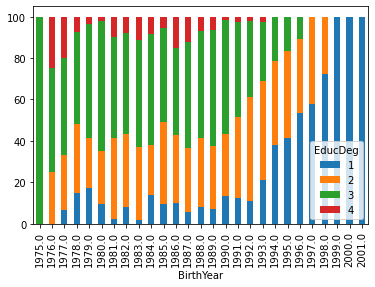

In [37]:
# Assumption 1: EducDeg should correspond with BirthYear
aggre= yrcheck_df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- The BirthYear variable follows highly logical correlation with EducDeg, especially looking at primary education, which is mandatory for all citizens in Portugal

<AxesSubplot:xlabel='BirthYear'>

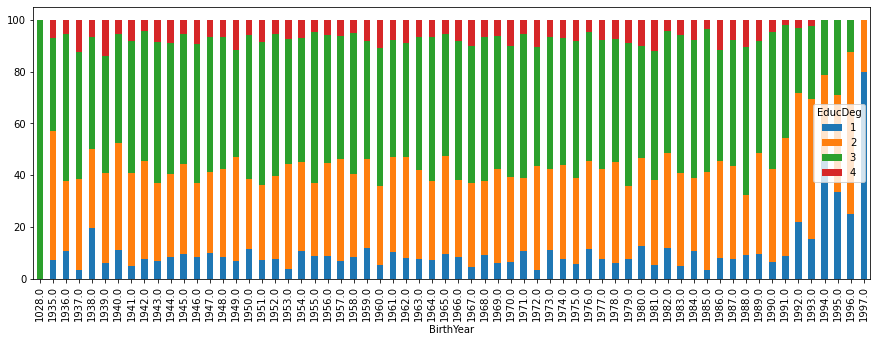

In [38]:
# Compare the trend where the coherence check pases
yrcheck_df = df.query('FirstPolYear >= BirthYear').copy()

plt.rcParams['figure.figsize'] = [15, 5]
aggre= yrcheck_df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='BirthYear'>

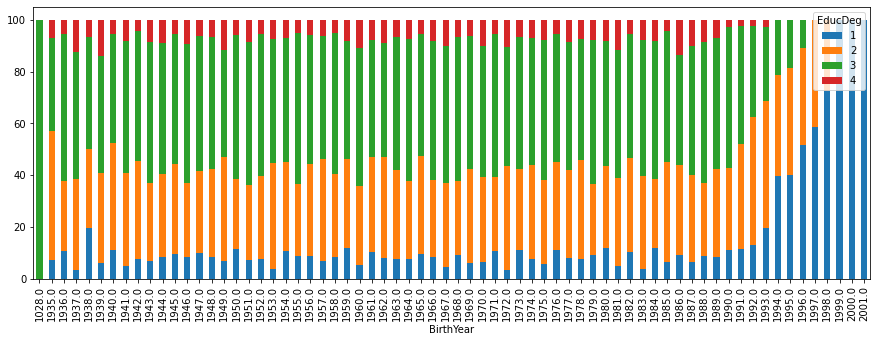

In [39]:
plt.rcParams['figure.figsize'] = [15, 5]
aggre= df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- Again to highlight: the BirthYear variable follows highly logical correlation with EducDeg, especially looking at primary education, which is mandatory for all citizens in Portugal
- meaning, if we reject BrithYear variable, we should suspect EducDeg variable as well.

In [40]:
# Assumption 2: Children should correspond with BirthYear
yrcheck_df = df.query('FirstPolYear < BirthYear').copy()
yrcheck_df['BirthYear'].value_counts().sort_index()

1975.0      3
1976.0      4
1977.0     15
1978.0     27
1979.0     29
1980.0     43
1981.0     41
1982.0     51
1983.0     54
1984.0     71
1985.0     73
1986.0     91
1987.0     90
1988.0     85
1989.0     96
1990.0    125
1991.0    113
1992.0    129
1993.0    115
1994.0    144
1995.0    131
1996.0    129
1997.0    128
1998.0     94
1999.0     69
2000.0     35
2001.0     12
Name: BirthYear, dtype: int64

<AxesSubplot:xlabel='BirthYear'>

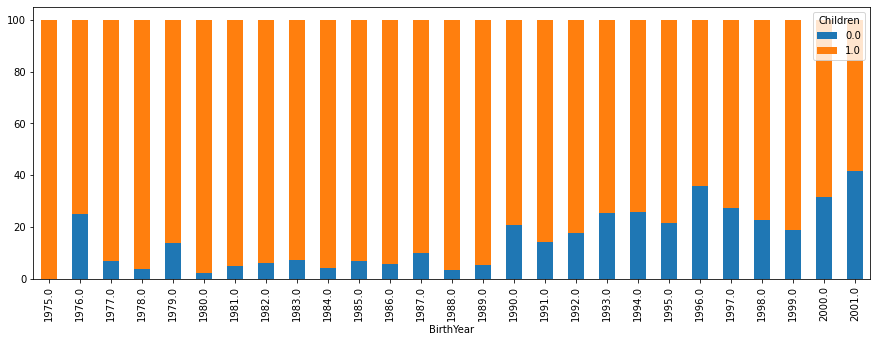

In [41]:
# Assumption 2: Children should correspond with BirthYear
yrcheck_df = df.query('FirstPolYear < BirthYear').copy()

aggre = yrcheck_df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [42]:
yrcheck_df = df.query('FirstPolYear < BirthYear').copy()

- significant ratio of people under age of 18 appear to have children. This may be illogical, but that may be due to the sampling bias--if you have a kid at very young age, you are more likely to seek insurance coverage.

In [43]:
# If we only look at people who were adults when they made their first policy
adultfirstpol = df.copy()
adultfirstpol.insert(3, 'entryAge', (adultfirstpol['FirstPolYear'] - adultfirstpol['BirthYear']))
adultfirstpol = adultfirstpol.loc[(adultfirstpol["entryAge"] >= 18)]
len(adultfirstpol)

5196

<AxesSubplot:xlabel='BirthYear'>

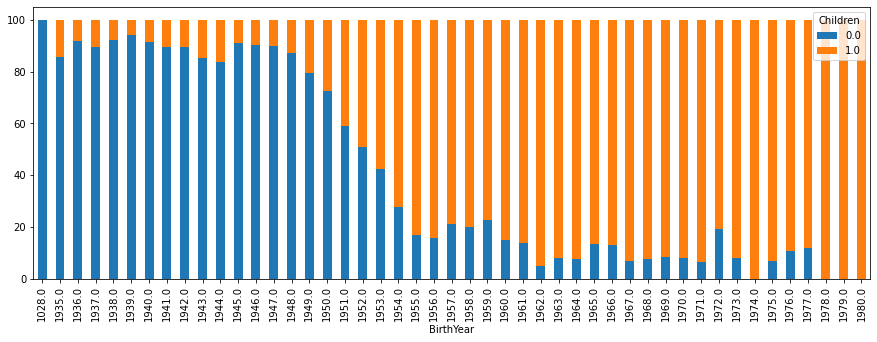

In [44]:
aggre = adultfirstpol[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='entryAge'>

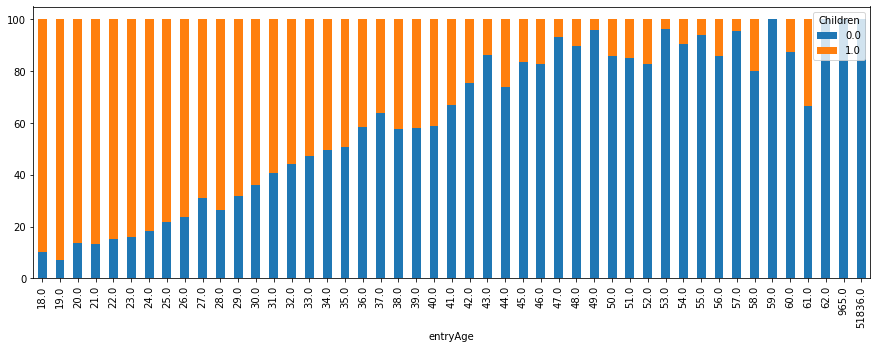

In [45]:
aggre = adultfirstpol[['entryAge','Children']].groupby(['entryAge','Children'])['entryAge'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [46]:
# If we only look at minimum age for insurance coverage
minagefirstpol = df.copy()
minagefirstpol.insert(3, 'entryAge', (minagefirstpol['FirstPolYear'] - minagefirstpol['BirthYear']))
minagefirstpol = minagefirstpol.loc[(minagefirstpol["entryAge"] >= 10)]
len(minagefirstpol)

6548

<AxesSubplot:xlabel='BirthYear'>

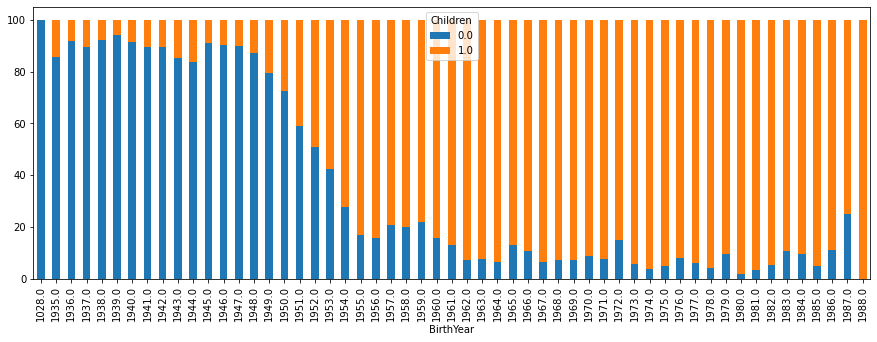

In [47]:
aggre = minagefirstpol[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='entryAge'>

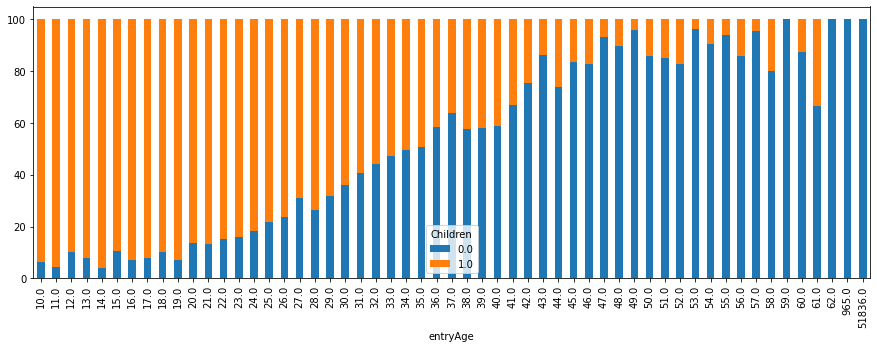

In [48]:
aggre = minagefirstpol[['entryAge','Children']].groupby(['entryAge','Children'])['entryAge'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [49]:
pd.set_option("display.max_rows", None)

In [50]:
yrcheck_df = df.query('FirstPolYear >= BirthYear').copy()
yrcheck_df['BirthYear'].value_counts().sort_index()

1028.0      1
1935.0     14
1936.0     37
1937.0     57
1938.0     76
1939.0    100
1940.0    126
1941.0    145
1942.0    161
1943.0    163
1944.0    170
1945.0    165
1946.0    182
1947.0    170
1948.0    165
1949.0    178
1950.0    150
1951.0    185
1952.0    186
1953.0    192
1954.0    184
1955.0    171
1956.0    173
1957.0    173
1958.0    171
1959.0    171
1960.0    165
1961.0    155
1962.0    205
1963.0    186
1964.0    191
1965.0    160
1966.0    168
1967.0    179
1968.0    199
1969.0    130
1970.0    170
1971.0    149
1972.0    143
1973.0    163
1974.0    186
1975.0    173
1976.0    165
1977.0    168
1978.0    146
1979.0    134
1980.0    127
1981.0    149
1982.0    111
1983.0    103
1984.0    113
1985.0     85
1986.0     86
1987.0     78
1988.0     77
1989.0     74
1990.0     64
1991.0     46
1992.0     32
1993.0     39
1994.0     33
1995.0     24
1996.0      8
1997.0      5
Name: BirthYear, dtype: int64

In [51]:
pd.set_option("display.max_rows", 14)

<AxesSubplot:xlabel='BirthYear'>

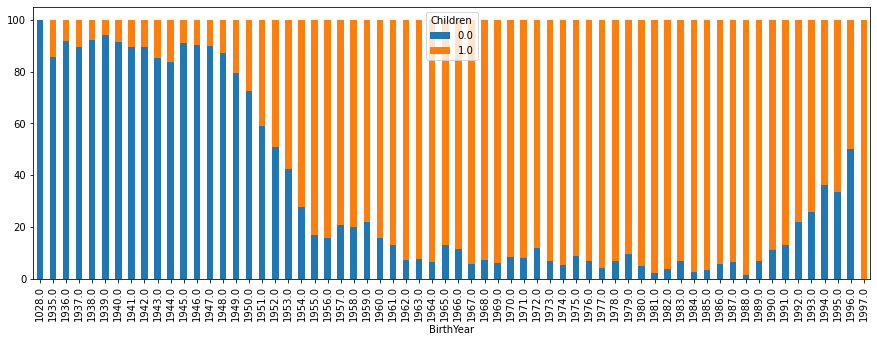

In [52]:
# Compare the trend where the coherence check pases
yrcheck_df = df.query('FirstPolYear >= BirthYear').copy()

plt.rcParams['figure.figsize'] = [15, 5]
aggre = yrcheck_df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- All data from birthyear 1997 fails coherence test. In year 2016, these individuals are 19 years old. But the data refers to premium paid in 2016, meaning the year people born in 1997 entered the contract was 2015, when they were 18. Note, Age of 18 is the age you are no longer required parental consent to make an insurance policy.
- older you get, less likely you have children: Children variable may not be whether they have a child, but whether they have a child in the household. The graph above follows this trend.

<AxesSubplot:xlabel='BirthYear'>

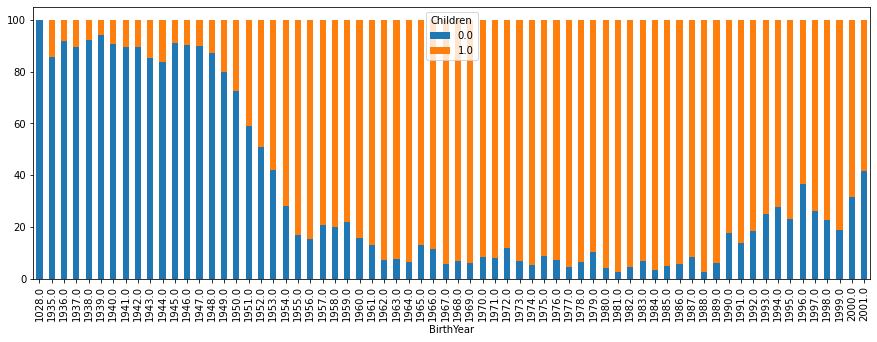

In [53]:
# Total trend
plt.rcParams['figure.figsize'] = [15, 5]
aggre = df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [54]:
len(df[(df['Children'] == 1) & (df['BirthYear'] == 1999)])

56

In [55]:
# You can be as young as 10 to enter an insurance policy as long as you have parental consent(needs to be checked for portugal)
# PremMotor check, since minimum age for driving is 16 in Portugal (motorcycle).
# PremWork, min working age is 16.
df[(df['BirthYear'] > 1999)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
13,14.0,1983.0,2000.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
397,398.0,1986.0,2000.0,1,415.0,1.0,1.0,-218.48,1.22,52.01,348.40,49.01,193.48,225.82
659,660.0,1991.0,2001.0,1,1284.0,4.0,1.0,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
689,690.0,1997.0,2001.0,1,1180.0,3.0,1.0,436.10,0.48,54.90,406.20,65.79,112.02,256.05
865,866.0,1979.0,2001.0,1,562.0,1.0,1.0,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,9038.0,1982.0,2000.0,1,1222.0,4.0,1.0,109.58,0.90,16.56,877.95,90.35,134.58,172.81
9557,9558.0,1988.0,2000.0,1,808.0,3.0,0.0,1387.39,0.05,22.56,1132.45,81.46,224.93,32.45
9636,9637.0,1992.0,2000.0,1,1001.0,4.0,0.0,704.35,0.31,43.34,570.10,241.49,87.24,115.91
9906,9907.0,1976.0,2001.0,1,1422.0,1.0,1.0,467.31,0.37,69.68,231.15,201.26,191.48,82.35


# 3. Data Preparation  <a class="anchor" id="3"></a>

## 3.1 Data Selection  <a class="anchor" id="3.1"></a>

We are tasked with a segmentation problem, without specific feature of interest communicated from the insurance company. Therefore feature selection can be done qualitatively, with some consideration of results found from the previous sections (e.g., multicollinearity)

we can mention Lucas's job as a industry insider's opinion?

## 3.2 Data Cleaning  <a class="anchor" id="3.2"></a>

### 3.2.1 Coherence check -  Impossible Values

In [56]:
df.max()

CustID            10296.0
FirstPolYear      53784.0
BirthYear          2001.0
MonthSal          55215.0
GeoLivArea            4.0
Children              1.0
CustMonVal       11875.89
ClaimsRate          256.2
PremMotor        11604.42
PremHousehold     25048.8
PremHealth        28272.0
PremLife            398.3
PremWork           1988.7
dtype: object

In [57]:
df.min()

CustID                 1.0
FirstPolYear        1974.0
BirthYear           1028.0
MonthSal             333.0
GeoLivArea             1.0
Children               0.0
CustMonVal      -165680.42
ClaimsRate             0.0
PremMotor            -4.11
PremHousehold        -75.0
PremHealth           -2.11
PremLife              -7.0
PremWork             -12.0
dtype: object

need to check:
- max: FirstPolYear
- min: BirthYear

Other variables may have extreme values, but are not impossible

In [58]:
df.nlargest(5, 'FirstPolYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
9294,9295.0,53784.0,1948.0,3,3268.0,1.0,0.0,348.85,0.37,351.40,15.0,187.37,22.45,17.78
23,24.0,1998.0,1961.0,2,2870.0,4.0,1.0,290.05,0.64,222.04,329.5,248.38,48.01,33.56
65,66.0,1998.0,1941.0,3,3760.0,1.0,0.0,132.27,0.78,276.83,175.6,261.27,6.89,-6.11
279,280.0,1998.0,1938.0,1,4386.0,1.0,0.0,193.04,0.79,96.02,541.2,189.59,127.69,90.35
506,507.0,1998.0,1942.0,1,3743.0,1.0,0.0,-46.67,1.02,85.24,554.0,307.39,46.12,24.45


In [59]:
df.nsmallest(10, 'BirthYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7195,7196.0,1993.0,1028.0,3,2830.0,4.0,0.0,146.02,0.77,428.97,192.80,108.91,1.89,23.67
329,330.0,1979.0,1935.0,2,4292.0,1.0,1.0,-47.77,1.04,457.64,-20.55,94.35,47.23,-1.11
958,959.0,1996.0,1935.0,1,4133.0,2.0,1.0,594.33,0.38,257.05,511.20,129.58,29.56,78.57
1013,1014.0,1996.0,1935.0,3,4247.0,2.0,0.0,-98.79,1.09,142.36,299.50,307.17,24.67,73.79
3191,3192.0,1990.0,1935.0,3,4475.0,3.0,0.0,433.97,0.45,111.80,339.50,268.83,106.91,12.56
3293,3294.0,1991.0,1935.0,2,3859.0,3.0,0.0,644.45,0.25,144.47,358.95,178.59,166.03,50.01
3454,3455.0,1984.0,1935.0,2,3446.0,3.0,0.0,296.41,0.57,201.37,219.50,228.82,51.90,50.01
7266,7267.0,1975.0,1935.0,4,4597.0,3.0,0.0,295.53,0.41,460.53,-65.00,134.58,-5.00,14.89
7440,7441.0,1995.0,1935.0,2,3782.0,1.0,0.0,87.80,0.84,237.60,161.70,262.16,37.34,11.56
7956,7957.0,1997.0,1935.0,2,3767.0,2.0,0.0,68.81,0.85,172.81,87.25,273.83,46.23,52.79


In [60]:
# we drop these two records
df = df.loc[(df["FirstPolYear"] != 53784.0)]
df = df.loc[(df["BirthYear"] != 1028.0)]

In [61]:
# Just drop it for now I can't decide before calling up a portuguese insurance company to ask about legality of stuff.
df = df.drop("BirthYear", axis=1)

### 3.1.2 Outliers
Concept of "outlier" doesn't really apply to categorical variables.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10294 entries, 0 to 10295
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10294 non-null  float64
 1   FirstPolYear   10264 non-null  float64
 2   EducDeg        10277 non-null  object 
 3   MonthSal       10258 non-null  float64
 4   GeoLivArea     10293 non-null  object 
 5   Children       10273 non-null  object 
 6   CustMonVal     10294 non-null  float64
 7   ClaimsRate     10294 non-null  float64
 8   PremMotor      10260 non-null  float64
 9   PremHousehold  10294 non-null  float64
 10  PremHealth     10251 non-null  float64
 11  PremLife       10190 non-null  float64
 12  PremWork       10208 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.1+ MB


#### 2.4.3.1 Data Normalization

In [66]:
# Data Normalization
# Min-max, albeit simple, is very popular and effective.
# https://www.researchgate.net/publication/354751895_Machine_Learning_to_Estimate_Surface_Roughness_from_Satellite_Images 
# Robust Scaler
# Yeo-Johnson

# prepare dataframe to be scaled. We need this step because we will be imputing missing values, but to run scaling algorithms we need to deal with the missing values.
# hence we temporarily replace with median values and check the results, then impute the missing data later, after removing the outliers.
numeric_df = numeric_var.set_index("CustID")
numeric_df.fillna(numeric_df.median(), inplace=True)

In [75]:
minmax = MinMaxScaler()
robust = RobustScaler()
yeojohnson = PowerTransformer('yeo-johnson')

# transform data
scaled_minmax = minmax.fit_transform(numeric_df)
scaled_robust = robust.fit_transform(numeric_df)
scaled_yeojohn = yeojohnson.fit_transform(numeric_df)


# Change below (Reference code)
# Merging
X_merged = np.concatenate((scaled_minmax, scaled_robust, scaled_yeojohn), axis=1)

# Creating DataFrame
merge_labels = list(map(lambda x: "minmax_" + x, numeric_df.columns.to_list())) + list(map(lambda x: "robust_" + x, numeric_df.columns.to_list())) + list(map(lambda x: "yeojohn_" + x, numeric_df.columns.to_list()))
merged_df = pd.DataFrame(X_merged, columns=merge_labels, index=numeric_df.index)

In [76]:
merged_df

,minmax_FirstPolYear,minmax_BirthYear,minmax_MonthSal,minmax_CustMonVal,minmax_ClaimsRate,minmax_PremMotor,minmax_PremHousehold,minmax_PremHealth,minmax_PremLife,minmax_PremWork,...,yeojohn_FirstPolYear,yeojohn_BirthYear,yeojohn_MonthSal,yeojohn_CustMonVal,yeojohn_ClaimsRate,yeojohn_PremMotor,yeojohn_PremHousehold,yeojohn_PremHealth,yeojohn_PremLife,yeojohn_PremWork
CustID,,,,,,,,,,,,,,,,,,,,,
1.0,0.000212,0.980473,0.033599,0.935260,0.001522,0.032731,0.006148,0.005251,0.133259,0.014440,...,0.0,0.778137,0.0,0.373955,-0.796802,0.581980,-0.321884,-0.100850,0.385992,-0.351488
2.0,0.000135,0.993834,0.006268,0.932376,0.004372,0.007027,0.019551,0.004202,0.497113,0.059044,...,0.0,1.604637,0.0,-0.672768,1.151893,-1.697488,0.850229,-0.525038,2.397354,1.341380
3.0,0.000328,0.968140,0.035421,0.935957,0.001093,0.018113,0.011921,0.004481,0.230323,0.055491,...,0.0,0.064023,0.0,0.740286,-1.231816,-0.482434,0.241336,-0.404848,1.071592,1.237347
4.0,0.000309,0.979445,0.013957,0.933019,0.003864,0.016074,0.004711,0.011080,0.104466,0.020163,...,0.0,0.716878,0.0,-0.601028,0.887181,-0.665162,-0.497257,1.485101,0.131877,-0.048609
5.0,0.000232,0.971223,0.026056,0.933313,0.003513,0.029524,0.004888,0.006532,0.063607,0.026716,...,0.0,0.238311,0.0,-0.523377,0.687801,0.375574,-0.474041,0.335628,-0.311891,0.244377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,0.000193,0.946557,0.052021,0.933114,0.003747,0.034272,0.004953,0.006222,0.041401,0.013385,...,0.0,-1.080909,0.0,-0.586374,0.822287,0.677203,-0.465574,0.236408,-0.636389,-0.414995
10293.0,0.000058,0.949640,0.038227,0.941031,0.000000,0.011861,0.044211,0.005141,0.049075,0.058545,...,0.0,-0.925124,0.0,3.722139,-2.655912,-1.088651,2.451371,-0.142042,-0.513006,1.326918
10294.0,0.000386,0.974306,0.047101,0.936067,0.000820,0.035124,0.008271,0.005106,0.048532,0.008442,...,0.0,0.415399,0.0,0.799164,-1.539827,0.728836,-0.096897,-0.155433,-0.521258,-0.776900


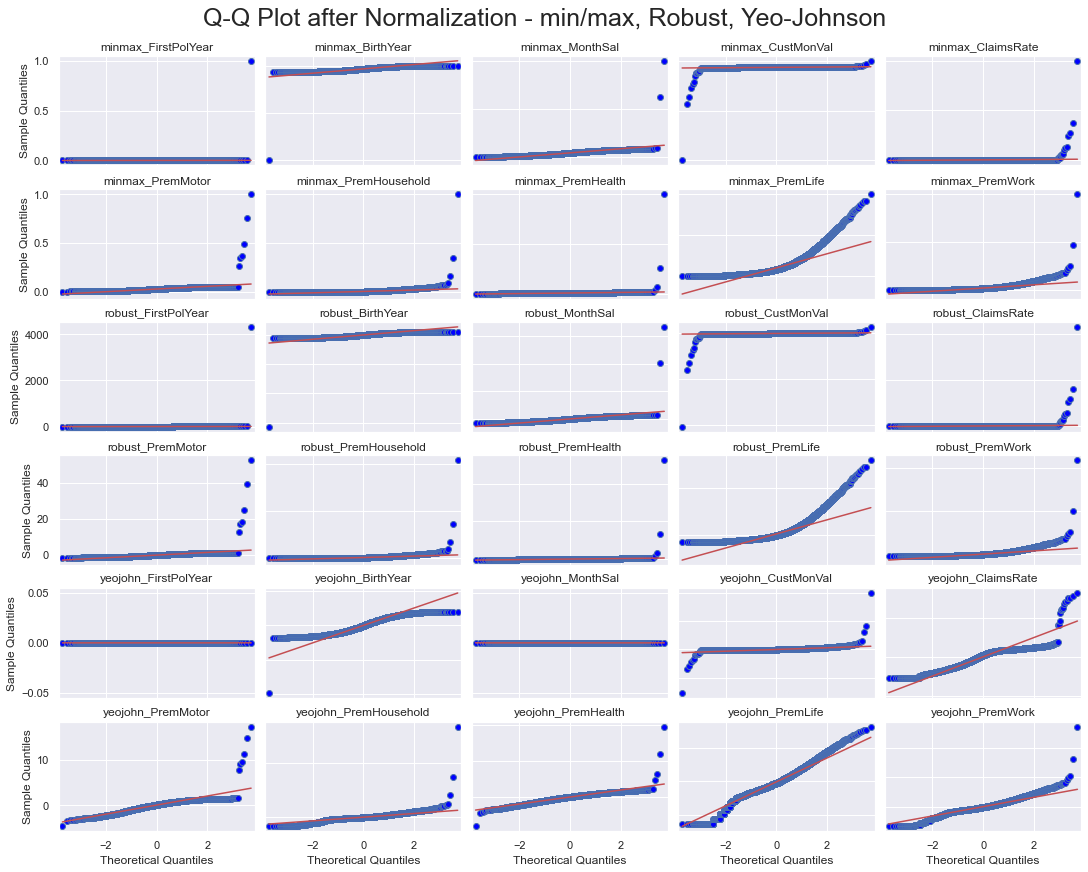

In [83]:
# Change below (Reference code)
# Plot transformed data
sns.set()
fig, axes = plt.subplots(6,5, constrained_layout=True, figsize=(15,12))

fig.suptitle("Q-Q Plot after Normalization - min/max, Robust, Yeo-Johnson", fontsize=25)

for col, ax in zip(merged_df.columns, axes.flatten()):
    x = merged_df.loc[:,col]
    sm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [104]:
# We will only use yeo-johnson as the results were most consistent (esepcially prem life)
# (Reference code)
scaled_yj_df = merged_df.loc[:,[i for i in merged_df.columns.to_list() if "yeojohn" in i]]
scaled_yj_df = scaled_yj_df.drop(['yeojohn_BirthYear'], axis = 1)

## Univariate

## Multivariate

In [ ]:
# SageMaker Random Cut Forests - closed source
# Isolation Forest

In [105]:
scale_out = scaled_yeojohn.copy()
scale_out = pd.DataFrame(scale_out)

In [106]:
# fit the model for outlier detection. we set contamination to auto
clf = LocalOutlierFactor(n_neighbors=20, contamination="auto")
# use fit_predict to compute the predicted labels of the training samples
y_pred = clf.fit_predict(scaled_yj_df)

In [107]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 165, 1: 10131}

In [108]:
#check who are these 1.4k observations
df_preds = pd.DataFrame(y_pred)
df_preds.columns = ['outliers']
df_preds.index = scaled_yj_df.index

data1 = df.add_prefix('yeojohn_')
data1 = pd.concat([data1,df_preds], axis=1, join="outer")

#check
outliers = data1.groupby(by=['outliers']).mean()
outliers[scaled_yj_df.columns]

,yeojohn_FirstPolYear,yeojohn_MonthSal,yeojohn_CustMonVal,yeojohn_ClaimsRate,yeojohn_PremMotor,yeojohn_PremHousehold,yeojohn_PremHealth,yeojohn_PremLife,yeojohn_PremWork
outliers,,,,,,,,,
-1.0,1985.290909,2471.369697,235.549697,0.682727,298.993415,218.643939,167.713354,39.686121,38.478720
1.0,1986.028322,2507.169342,176.919502,0.743819,300.469003,210.331364,171.650868,41.896904,41.329739


In [ ]:
#data1.drop(columns='level_0', inplace = True)
#data1 = data1.drop(data1[data1['outliers'] == -1].index)
#data1.reset_index(inplace = True)

In [ ]:
#Save versions of our data. 
#datasave = data1.copy()

In [ ]:
##There are no PremLife,PremMotor,PremHealth,PremWork equal to 0, which means that either all clients have this types of insurance 
## or the null values are the ones without it
##Since the PremHousehold is the only one with no null values and with 0 values, it is ok to infer that the null values in other types of
## premium are 0 ones, in the words, the client dosen't have
#df.loc[(df.PremLife==0)|
#       (df.PremMotor==0)|
#       (df.PremHousehold==0)|
#       (df.PremHealth==0)|
#       (df.PremWork==0)
#      ]

In [ ]:
## these are some clients that don't have any insurance (nan/0 values) and CustMonVal == -25 which is the acquisition value
## in that sense we can't make a cluster with this obs because would't be representative enought, so we decided to drop it
#no_insur = df.loc[(df.PremLife.isnull())&
#                   (df.PremMotor.isnull())&
#                   (df.PremHousehold==0) &
#                   (df.PremHealth.isnull())&
#                   (df.PremWork.isnull())
#                  ].index
#
#new_df.drop(new_df.iloc[no_insur,:].index,inplace=True)

In [ ]:
# premiuns = ['PremLife','PremMotor','PremHousehold','PremHealth','PremWork']
# new_df[premiuns] = new_df[premiuns].fillna(0)

In [ ]:
#birthyear imputation by mode based on EducDeg

In [ ]:
#salary missing values = try KNN inputation with children and birthyear

In [ ]:
#for outlier (alternative of IQR value)
#local outlier (multivariate)
#use pca to check what variables we should test together 

## 3.3 Data Construction  <a class="anchor" id="3.3"></a>

In [ ]:
# age from first policy
# considered swap when FirstPolYear is before BirthYear
new_df['ageFirstPolicy'] = np.where(new_df['FirstPolYear'] > new_df['BirthYear'], 
                                    new_df['FirstPolYear'] - new_df['BirthYear'], 
                                    new_df['BirthYear'] - new_df['FirstPolYear']) 
                                    

In [ ]:
# It doesent make sense to have any of this insurances as a kid. 
new_df.query('ageFirstPolicy<14')

# Maybe swap is not a good approach because it dosent fix the obs with same year of first policy and birth, also there are a lot

In [ ]:
#age from birthyear 
new_df['age'] = 2016.0 - new_df['BirthYear']

In [ ]:
#Salary - normalized
scaler = MinMaxScaler()
scaler.fit(np.array(new_df['MonthSal']).reshape(-1, 1))
new_df['normMonthSal'] = scaler.transform(np.array(new_df['MonthSal']).reshape(-1, 1))

In [ ]:
new_df['totalPremium'] = new_df['PremMotor'] + new_df['PremHousehold'] + new_df['PremHealth'] + new_df['PremLife'] + new_df['PremWork'] 

new_df['%PremMotor']     = new_df['PremMotor'] / new_df['totalPremium']
new_df['%PremHousehold'] = new_df['PremHousehold'] / new_df['totalPremium']
new_df['%PremHealth']    = new_df['PremHealth'] / new_df['totalPremium']
new_df['%PremLife']      = new_df['PremLife'] / new_df['totalPremium']
new_df['%PremWork']      = new_df['PremWork'] / new_df['totalPremium']

In [ ]:
#Class of normalized CustMonVal (equalDepth, equalWidth)
#dont know a good number of bins
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') #quantile=equalDepth
est.fit(new_df['CustMonVal'].values.reshape(-1, 1))

new_df['NormCustMonVal'] = est.transform(new_df['CustMonVal'].values.reshape(-1, 1))

In [ ]:
new_df.head()

## 3.4 Data Integration  <a class="anchor" id="3.4"></a>

In [ ]:
considered_df = new_df[['EducDeg',
                        'NormCustMonVal',
                        'Children',
                        'GeoLivArea',
                        'ageFirstPolicy',
                        'age',
                        'normMonthSal',
                        '%PremMotor',
                        '%PremHousehold',
                        '%PremHealth',
                        '%PremLife',
                        '%PremWork']]


## 3.5 Data Formatting  <a class="anchor" id="3.5"></a>

In [ ]:
# GeoLiveArea,  Children = Object

## 3.6 Data Description  <a class="anchor" id="3.6"></a>